In [1]:
# Import required libraries and dependencies
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

In [2]:
# Load the data into a Pandas DataFrame and make the index the "coin_id" column.
market_data_df = pd.read_csv("Resources/crypto_market_data.csv", index_col="coin_id")

# Display sample data
market_data_df.head(10)

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
coin_id,,,,,,,
bitcoin,1.08388,7.60278,6.57509,7.67258,-3.25185,83.51840,37.51761
ethereum,0.22392,10.38134,4.80849,0.13169,-12.88890,186.77418,101.96023
tether,-0.21173,0.04935,0.00640,-0.04237,0.28037,-0.00542,0.01954
ripple,-0.37819,-0.60926,2.24984,0.23455,-17.55245,39.53888,-16.60193
bitcoin-cash,2.90585,17.09717,14.75334,15.74903,-13.71793,21.66042,14.49384
binancecoin,2.10423,12.85511,6.80688,0.05865,36.33486,155.61937,69.69195
chainlink,-0.23935,20.69459,9.30098,-11.21747,-43.69522,403.22917,325.13186
cardano,0.00322,13.99302,5.55476,10.10553,-22.84776,264.51418,156.09756
litecoin,-0.06341,6.60221,7.28931,1.21662,-17.23960,27.49919,-12.66408


In [3]:
# Generate summary statistics
market_data_df.describe()

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,-0.269686,4.497147,0.185787,1.545693,-0.094119,236.537432,347.667956
std,2.694793,6.375218,8.376939,26.344218,47.365803,435.225304,1247.842884
min,-13.527860,-6.094560,-18.158900,-34.705480,-44.822480,-0.392100,-17.567530
25%,-0.608970,0.047260,-5.026620,-10.438470,-25.907990,21.660420,0.406170
50%,-0.063410,3.296410,0.109740,-0.042370,-7.544550,83.905200,69.691950
75%,0.612090,7.602780,5.510740,4.578130,0.657260,216.177610,168.372510
max,4.840330,20.694590,24.239190,140.795700,223.064370,2227.927820,7852.089700


### Prepare the Data

In [4]:
# Use the `StandardScaler()` module from scikit-learn to normalize the data from the CSV file
scaler = StandardScaler()
scaled_data = scaler.fit_transform(market_data_df)

In [6]:
if 'coin_name' in market_data_df.columns:
    crypto_names = market_data_df['coin_name']
else:
    crypto_names = pd.Series([])  # Create an empty Series if 'coin_name' column does not exist


### Find the Best Value for k Using the Original Scaled DataFrame.

In [10]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
if 'coin_name' in scaled_data_df.columns:
    kmeans.fit(scaled_data_df.drop(columns=['coin_name']))
else:
    kmeans.fit(scaled_data_df)

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(inertia)

# Display the DataFrame
(elbow_df)

c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


""


In [ ]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following question: 
**Question:** What is the best value for `k`?

**Answer:**

### Cluster Cryptocurrencies with K-means Using the Original Scaled Data.

In [11]:
# Initialize the K-Means model using the best value for k
best_k = 4  # Assuming 4 is the best from the Elbow curve
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [12]:
# Fit the K-Means model using the scaled data
kmeans.fit(scaled_data_df)

c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


KMeans(n_clusters=4, random_state=0)

In [13]:
# Predict the clusters to group the cryptocurrencies using the scaled data
clusters = kmeans.predict(scaled_data_df)

# View the resulting array of cluster values.
(clusters)

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [14]:
# Create a copy of the DataFrame
clustered_data = scaled_data_df.copy()

In [15]:
# Add a new column to the DataFrame with the predicted clusters
clustered_data['Cluster'] = clusters

# Display sample data
(clustered_data.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


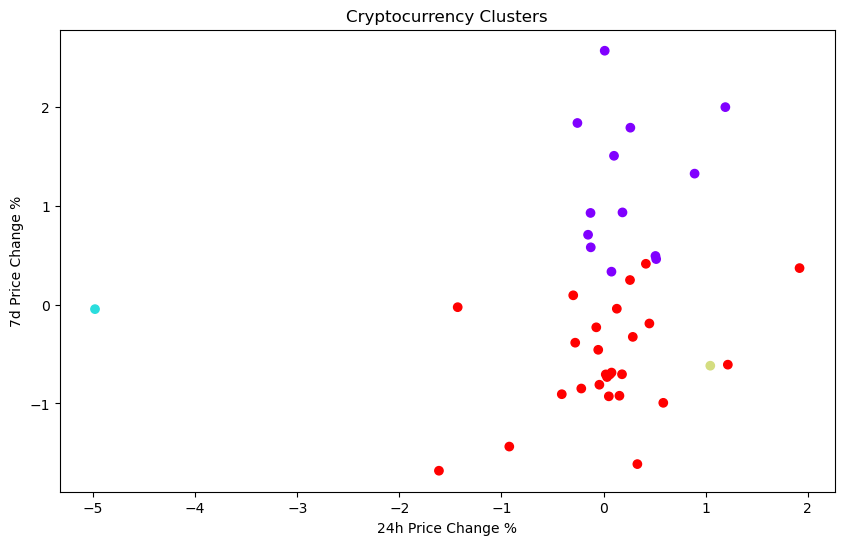

In [18]:
# Create a scatter plot using Pandas plot by setting 
# `x="price_change_percentage_24h"` and `y="price_change_percentage_7d"`.
# Use "rainbow" for the color to better visualize the data.
plt.figure(figsize=(10, 6))
plt.scatter(clustered_data['price_change_percentage_24h'], clustered_data['price_change_percentage_7d'], 
            c=clustered_data['Cluster'], cmap='rainbow')
plt.title('Cryptocurrency Clusters')
plt.xlabel('24h Price Change %')
plt.ylabel('7d Price Change %')
plt.show()

### Optimize Clusters with Principal Component Analysis.

In [19]:
# Create a PCA model instance and set `n_components=3`.
pca = PCA(n_components=3)

In [20]:
# Use the PCA model with `fit_transform` on the original scaled DataFrame to reduce to three principal components.
pca_data = pca.fit_transform(scaled_data_df)

# View the first five rows of the DataFrame. 
(pd.DataFrame(pca_data).head())


,0,1,2
0,-0.600667,0.842760,0.461595
1,-0.458261,0.458466,0.952877
2,-0.433070,-0.168126,-0.641752
3,-0.471835,-0.222660,-0.479053
4,-1.157800,2.041209,1.859715


In [21]:
# Retrieve the explained variance to determine how much information  can be attributed to each principal component.
(pca.explained_variance_ratio_)

array([0.3719856 , 0.34700813, 0.17603793])

#### Answer the following question: 

**Question:** What is the total explained variance of the three principal components?

**Answer:** 

In [22]:
# Create a new DataFrame with the PCA data.
# Note: The code for this step is provided for you

# Creating a DataFrame with the PCA data
pca_df = pd.DataFrame(pca_data, columns=['PC1', 'PC2', 'PC3'], index=scaled_data_df.index)


# Copy the crypto names from the original data
pca_df['coinid'] = scaled_data_df.index


# Set the coinid column as index
pca_df.set_index('coinid', inplace=True)

# Display sample data
pca_df.head()

,PC1,PC2,PC3
coinid,,,
bitcoin,-0.600667,0.842760,0.461595
ethereum,-0.458261,0.458466,0.952877
tether,-0.433070,-0.168126,-0.641752
ripple,-0.471835,-0.222660,-0.479053
bitcoin-cash,-1.157800,2.041209,1.859715


### Find the Best Value for k Using the PCA Data

In [23]:
# Create a list with the number of k-values to try
# Use a range from 1 to 11
k_values = range(1, 11)

# Create an empty list to store the inertia values
inertia = []

# Create a for loop to compute the inertia with each possible value of k
for k in k_values:
    # 1. Create a KMeans model using the loop counter for the n_clusters
    kmeans = KMeans(n_clusters=k, random_state=0)
    
    # 2. Fit the model to the data using PCA DataFrame
    kmeans.fit(pca_df)
    
    # 3. Append the model.inertia_ to the inertia list
    inertia.append(kmeans.inertia_)

# Create a dictionary with the data to plot the Elbow curve
elbow_data = {'k': k_values, 'inertia': inertia}

# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame(elbow_data)

# Display the DataFrame
(elbow_df)

c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environme

,k,inertia
0,1,256.874086
1,2,165.901994
2,3,93.774626
3,4,49.665497
4,5,37.878747
5,6,27.618972
6,7,21.182776
7,8,17.389823
8,9,13.593650
9,10,10.559358


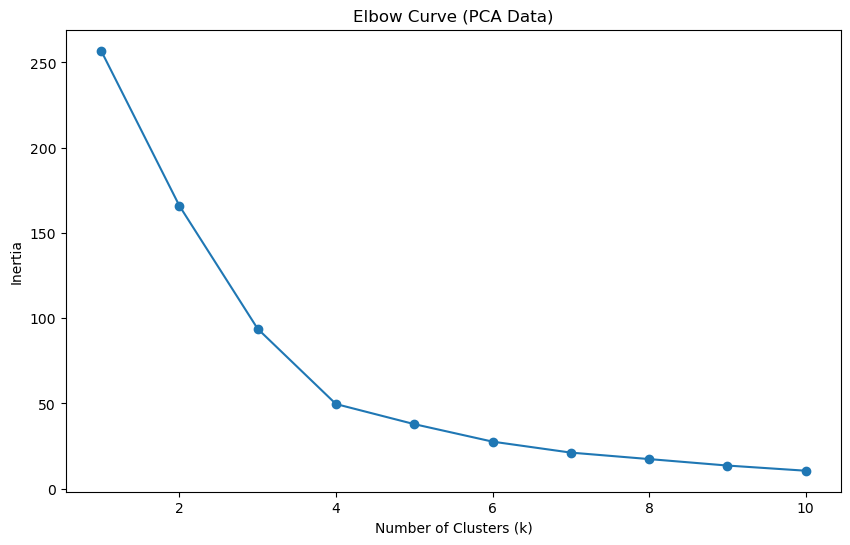

In [24]:
# Plot a line chart with all the inertia values computed with 
# the different values of k to visually identify the optimal value for k.
plt.figure(figsize=(10, 6))
plt.plot(elbow_df['k'], elbow_df['inertia'], marker='o')
plt.title('Elbow Curve (PCA Data)')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.show()

#### Answer the following questions: 
* **Question:** What is the best value for `k` when using the PCA data?

  * **Answer:** 


* **Question:** Does it differ from the best k value found using the original data?

  * **Answer:** 

### Cluster Cryptocurrencies with K-means Using the PCA Data

In [25]:
# Initialize the K-Means model using the best value for k
kmeans = KMeans(n_clusters=best_k, random_state=0)

In [27]:
if 'coin_name' in scaled_data_df.columns:
    kmeans.fit(scaled_data_df.drop(columns=['coin_name']))
else:
    kmeans.fit(scaled_data_df)


c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\ericd\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1382: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


In [29]:
if 'coin_name' in scaled_data_df.columns:
    clusters = kmeans.predict(scaled_data_df.drop(columns=['coin_name']))
else:
    clusters = kmeans.predict(scaled_data_df)

# Print the resulting array of cluster values.
(clusters)

array([0, 0, 3, 3, 0, 0, 0, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 3, 0, 3, 3, 0,
       3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 1, 0, 3, 3, 2, 3, 3, 3, 3])

In [30]:
# Create a copy of the DataFrame with the PCA data
clustered_data_df = scaled_data_df.copy()

# Add a new column to the DataFrame with the predicted clusters
clustered_data_df['Cluster'] = clusters

# Display sample data
(clustered_data_df.head(10))

,price_change_percentage_24h,price_change_percentage_7d,price_change_percentage_14d,price_change_percentage_30d,price_change_percentage_60d,price_change_percentage_200d,price_change_percentage_1y,Cluster
coin_id,,,,,,,,
bitcoin,0.508529,0.493193,0.772200,0.235460,-0.067495,-0.355953,-0.251637,0
ethereum,0.185446,0.934445,0.558692,-0.054341,-0.273483,-0.115759,-0.199352,0
tether,0.021774,-0.706337,-0.021680,-0.061030,0.008005,-0.550247,-0.282061,3
ripple,-0.040764,-0.810928,0.249458,-0.050388,-0.373164,-0.458259,-0.295546,3
bitcoin-cash,1.193036,2.000959,1.760610,0.545842,-0.291203,-0.499848,-0.270317,0
binancecoin,0.891871,1.327295,0.800214,-0.057148,0.778653,-0.188232,-0.225533,0
chainlink,0.011397,2.572251,1.101647,-0.490495,-0.931954,0.387759,-0.018284,0
cardano,0.102530,1.508001,0.648885,0.328959,-0.486349,0.065080,-0.155428,0
litecoin,0.077497,0.334297,0.858520,-0.012646,-0.366477,-0.486266,-0.292351,0


In [34]:
# Define the variable scaled_data_df before using it
scaled_data_df = pd.DataFrame(...)  # Replace ... with the appropriate code to create the scaled_data_df DataFrame

# Define the variable pca_df_2d before using it
pca_df_2d = pd.DataFrame(pca_data[:, :2], columns=['PCA1', 'PCA2'], index=scaled_data_df.index)

# Continue with the rest of the code
scatter_plot = pca_df_2d.hvplot.scatter(x='PCA1', y='PCA2', by='Cluster', hover_cols=['coin_name'], title='Cryptocurrency Clusters (PCA)')
scatter_plot

ValueError: DataFrame constructor not properly called!

### Determine the Weights of Each Feature on each Principal Component

In [ ]:
# Use the columns from the original scaled DataFrame as the index.


#### Answer the following question: 

* **Question:** Which features have the strongest positive or negative influence on each component? 
 
* **Answer:** 
    